Bonus (Optional)

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:


Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<your_db_name>')
connection = engine.connect()

Create a histogram to visualize the most common salary ranges for employees.

Create a bar chart of average salary by title.

In [1]:
!pip install psycopg2

In [6]:
#Dependenies
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [7]:
#Create engine and connection
engine = create_engine('postgresql://localhost:5432/workplace_db')
connection = engine.connect()
engine

Engine(postgresql://localhost:5432/workplace_db)

In [5]:
# Check database is being read
# Query All Records in the the Database
emp_df = engine.execute("SELECT * FROM salaries")

for record in data:
    print(record)

NameError: name 'data' is not defined

Most Common Salary Ranges

-Create a histogram to represent most common salary ranges

In [10]:
# Query All Records in the the Database

# Query All Records in the the Database and get a high level view of the stats (min, max, median) especially of the salary breakdown.
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
print(salaries_df.head())
salaries_df.describe()

   emp_no  salary
0   10001   60117
1   10002   65828
2   10003   40006
3   10004   40054
4   10005   78228


,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [11]:
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


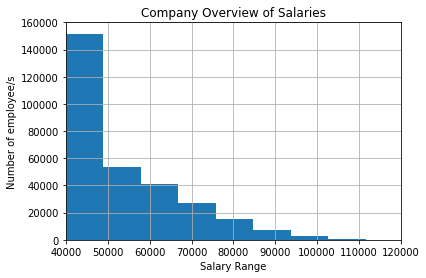

In [62]:
salary_graph=salaries_df.hist(column="salary",bins=10)
salary_graph

# Set a title for the chart
plt.title("Company Overview of Salaries")
plt.ylabel("Number of employee/s")
plt.xlabel("Salary Range")

#Set x-axis and y-axis range
plt.xlim(40000,120000)
plt.ylim(0,160000)

#Save figure
plt.savefig("Company Overview of Salaries.png",bbox_inches="tight")
plt.show()

Create a bar chart of average salary by title.

In [63]:
# Query All Records in the the Database for:
#emp_no, titles, salary

##### QUERY FOR REQUIRED HEADINGS SAVED AS VIEW ON POSTGRES (AS BELOW)#####
# CREATE VIEW QBONUS AS --Saved as a view 'QBONUS' in Database
# SELECT emp.emp_no, titles.title, sal.salary 
#     FROM Employees emp
#     INNER JOIN Titles 
#     ON emp.title_id=titles.title_id
#         INNER JOIN Salaries sal
#         ON emp.emp_no=sal.emp_no;
############################################

#Create connection and import view from postgres into pandas.
titles_sal_df = pd.read_sql(
    "SELECT * FROM QBONUS",connection)
#Check data is imported and the number of row count (ie. number of employees).
print(titles_sal_df.head())
titles_sal_df.info()
    

   emp_no            title  salary
0   10005            Staff   78228
1   10010         Engineer   72488
2   10011            Staff   42365
3   10018  Senior Engineer   55881
4   10035  Senior Engineer   41538
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   emp_no  300024 non-null  int64 
 1   title   300024 non-null  object
 2   salary  300024 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


In [56]:
#Group by title
titles_sal_gp_df=titles_sal_df.groupby(["title"])
titles_meansalary_gp_df=titles_sal_gp_df.mean()#["salary"]
titles_meansalary_gp_df

###FORMATTING ######
#Re-index
titles_meansalary_gp_df=titles_meansalary_gp_df.reset_index()
titles_meansalary_gp_df
#Drop column 'emp_no'
titles_meansalary_gp_df=titles_meansalary_gp_df.drop(columns={"emp_no"})
titles_meansalary_gp_df


,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


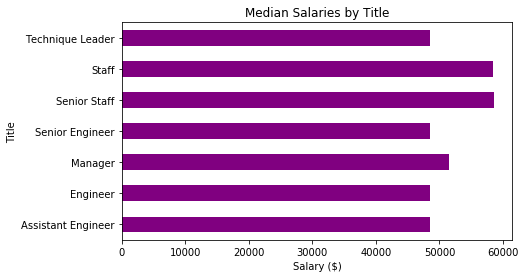

In [61]:
#Use DataFrame.plot() in order to create a bar chart of the data
titles_meansalary_gp_df.plot(kind="barh", figsize=(7,4), x='title',y="salary", rot=0, color="purple", legend=False);

# Set a title for the chart
plt.title("Median Salaries by Title")
plt.ylabel("Title")
plt.xlabel("Salary ($)")

#Save figure
plt.savefig("Median Salaries by Title.png",bbox_inches="tight")
plt.show()